In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import mpl_toolkits
from statistics import mean
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import sklearn.utils
os.getcwd()
import pandas_profiling as pp
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

from scipy.spatial.distance import pdist, squareform
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'C:\Users\fawaz\Desktop\us-accidents\US_Accidents_May19.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
ID                       2243939 non-null object
Source                   2243939 non-null object
TMC                      1727177 non-null float64
Severity                 2243939 non-null int64
Start_Time               2243939 non-null object
End_Time                 2243939 non-null object
Start_Lat                2243939 non-null float64
Start_Lng                2243939 non-null float64
End_Lat                  516762 non-null float64
End_Lng                  516762 non-null float64
Distance(mi)             2243939 non-null float64
Description              2243938 non-null object
Number                   785537 non-null float64
Street                   2243939 non-null object
Side                     2243939 non-null object
City                     2243871 non-null object
County                   2243939 non-null object
State                    2243939 non-null object
Zi

In [5]:
my_tab = pd.crosstab(index = [df["State"], df["Sunrise_Sunset"]], columns="counts")
my_tab

col_0                 counts
State Sunrise_Sunset        
AL    Day              16724
      Night             5339
AR    Day                745
      Night              274
AZ    Day              32518
      Night            10893
CA    Day             331577
      Night           153125
CO    Day              20118
      Night             6798
CT    Day              14222
      Night             4486
DC    Day               1804
      Night              747
DE    Day               2188
      Night              936
FL    Day             135308
      Night            42155
GA    Day              48439
      Night            18195
IA    Day               5996
      Night             2339
ID    Day                944
      Night              408
IL    Day              52826
      Night            18874
IN    Day              17541
      Night             6616
KS    Day               4258
      Night             1228
...                      ...
OK    Day              27653
      Night             8530
OR    Day              27576
      Night            14988
PA    Day              57653
      Night            18159
RI    Day               6618
      Night             1680
SC    Day              77166
      Night            22724
SD    Day                 28
      Night               16
TN    Day              32823
      Night             9641
TX    Day             182063
      Night            55574
UT    Day              15949
      Night             7263
VA    Day              44628
      Night            16798
VT    Day                309
      Night              109
WA    Day              34013
      Night            16467
WI    Day               9494
      Night             3388
WV    Day               1350
      Night              601
WY    Day                257
      Night              181

[98 rows x 1 columns]

In [6]:
#begin exploration of data
#how many collisions occur during the day vs the night
day_night_data = pd.crosstab(index = df["Sunrise_Sunset"], columns = "count")
day_night_labels = 'Day', 'Night'
print(len(day_night_data))
day_night_data

2


col_0,count
Sunrise_Sunset,
Day,1647331
Night,596530


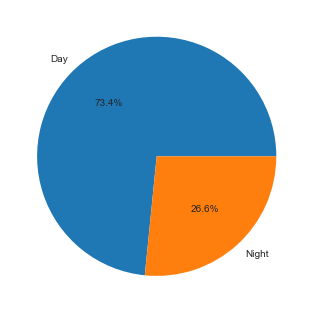

In [7]:
plt.pie(np.array(day_night_data).ravel(), labels = day_night_labels, autopct='%1.1f%%')
plt.show()

In [14]:
temperature_data = df['Temperature(F)']
#temperature_data = temperature_data.dropna()
temperature_data
freezing = 0
not_freezing = 0

#print(temperature_data.head(10))

#test1 = temperature_data.mean()
#test1

for row in temperature_data:
    if float(row) <= 32:
        freezing += 1
    else:
        not_freezing += 1
        

        
print('length of list', len(temperature_data))

print('freezing: ', freezing)
print('not_freezing: ', not_freezing)
#print(temperature_data)

length of list 2243939
freezing:  189282
not_freezing:  2054657


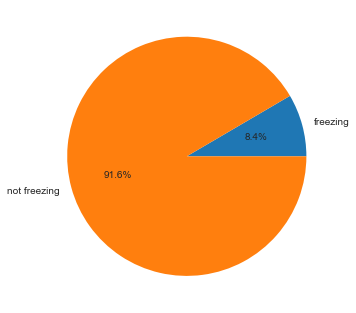

In [9]:
t_data = [freezing, not_freezing]
t_labels = 'freezing', 'not freezing'
plt.pie(np.array(t_data), labels = t_labels, autopct='%1.1f%%')
plt.show()

In [10]:
df_temp_reduced = df[['Severity', 'Temperature(F)']]
df_temp_reduced = df_temp_reduced.rename_axis(None)

#df_temp_reduced = df_temp_reduced.drop(df_temp_reduced.index[0])

#print(df_temp_reduced)

temperature_data_sev_1 = df_temp_reduced[(df_temp_reduced.Severity == 1) & (df_temp_reduced['Temperature(F)'])]
temperature_data_sev_2 = df_temp_reduced[(df_temp_reduced.Severity == 2) & (df_temp_reduced['Temperature(F)'])]
temperature_data_sev_3 = df_temp_reduced[(df_temp_reduced.Severity == 3) & (df_temp_reduced['Temperature(F)'])]
temperature_data_sev_4 = df_temp_reduced[(df_temp_reduced.Severity == 4) & (df_temp_reduced['Temperature(F)'])]

sev_1_list = temperature_data_sev_1['Temperature(F)'].to_list()
sev_2_list = temperature_data_sev_2['Temperature(F)'].to_list()
sev_3_list = temperature_data_sev_3['Temperature(F)'].to_list()
sev_4_list = temperature_data_sev_4['Temperature(F)'].to_list()

print(len(sev_1_list))
print(len(sev_2_list))
print(len(sev_3_list))
print(len(sev_4_list))

#print(sev_1_list)

792
1417973
693578
68749


In [11]:
freezing1 = 0
freezing2 = 0
freezing3 = 0
freezing4 = 0

not_freezing1 = 0
not_freezing2 = 0
not_freezing3 = 0
not_freezing4 = 0

for x in sev_1_list:
    if x <= 32:
        freezing1 += 1
    else:
        not_freezing1 += 1
        
for x in sev_2_list:
    if x <= 32:
        freezing2 += 1
    else:
        not_freezing2 += 1
        
for x in sev_3_list:
    if x <= 32:
        freezing3 += 1
    else:
        not_freezing3 += 1
        
for x in sev_4_list:
    if x <= 32:
        freezing4 += 1
    else:
        not_freezing4 += 1
        
total_freezing = [freezing1, freezing2, freezing3, freezing4]
total_not_freezing = [not_freezing1, not_freezing2, not_freezing3, not_freezing4]

print(total_freezing)
print(total_not_freezing)

[44, 116492, 62494, 9687]
[748, 1301481, 631084, 59062]


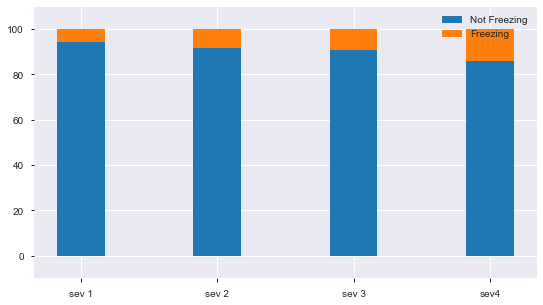

In [15]:
N = 4

ind = np.arange(N)
width = 0.35

overall = []
for x in range(0, len(total_freezing)):
    overall.append(total_freezing[x] + total_not_freezing[x])

proportion_freezing = np.true_divide(total_freezing, overall) * 100
proportion_not_freezing = np.true_divide(total_not_freezing, overall) * 100

plt.figure(figsize=(9,5))

p1 = plt.bar(ind, proportion_not_freezing, width)
p2 = plt.bar(ind, proportion_freezing, width, bottom = proportion_not_freezing)

plt.xticks(ind, ('sev 1', 'sev 2','sev 3','sev4'))
plt.ylim(-10, 110)

plt.legend((p1[0], p2[0]), ('Not Freezing', 'Freezing'))

#print(overall)
plt.show()